# Learning Algorithm

My solution uses Deep Q-Network to solve the Banana Navigation problem. The solution uses experience replay to record agent interactions and then uses it to pick random samples to improve the learning. The solution also uses fixed Q-Targets to improve the learning. With fixed Q-Targets, we use two identical Neural Networks (local and target) to update weights.  

# Hyperparameters

The solution makes use of following hyperparameters:
1. gamma (discount factor)=0.999
2. BATCH SIZE = 64
3. LR (Learning Rate) = 5e-4
4. UPDATE EVERY = 8
5. TAU = 1e-3
6. Epsilon = starts at 1.0 and decays towards 0.01 at the rate of 0.995

# Model Architecture

The solutions uses a deep neural network with following architecture:
1. First layer is the input layer of 37 
2. Second layer is a Linear layer of 512, followed by BatchNormalization layer of 512
4. Third layer is a Linear layer of 256, followed by BatchNormalization layer of 256
5. Final layer is a Linear layer of 64

<img src="images/model-architecture.jpg">


# Implementation

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Learning Banana Navigation using DQN
Episode: 100	 Mean Score: 0.13	 Max Steps=300
Episode: 200	 Mean Score: 2.09	 Max Steps=300
Episode: 300	 Mean Score: 5.24	 Max Steps=300
Episode: 400	 Mean Score: 8.25	 Max Steps=300
Episode: 500	 Mean Score: 10.67	 Max Steps=300
Episode: 600	 Mean Score: 12.29	 Max Steps=300
Episode: 700	 Mean Score: 11.69	 Max Steps=300
Episode: 766	 Mean Score: 13.06	 Max Steps=300
Environment solved in 666 episodes!\Mean Score: 13.06


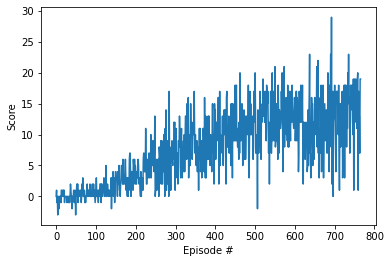

In [2]:
from unityagents import UnityEnvironment
from navigation_solution import NavigationSolution

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

env = UnityEnvironment(file_name="./Banana_Windows_x86_64/Banana.exe")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

nv = NavigationSolution(env)
print('Learning Banana Navigation using DQN')
scores = nv.learn(episodes=1000)
env.close()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# Video of the trained model

In [4]:
%%HTML
<div align="middle">
<video width="80%" controls>
      <source src="./trained-video.webm" type="video/webm">
</video></div>

# Try the trained model

In [1]:
from unityagents import UnityEnvironment
from navigation_solution import NavigationSolution
import time

env = UnityEnvironment(file_name="./Banana_Windows_x86_64/Banana.exe")
nv = NavigationSolution(env)
time.sleep(10)
nv.solve()
env.close()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Total score/reward=11.0


# My Learnings

As I was trying to train my model, I had few learnings of my own. I will try to list these down below:

0. I set myself a goal to achieve the required mean score of 13 under 1000 episodes.
1. I started with a model with 2 or 3 layers with relatively small nodes (e.g 64 or 128). This was giving me an mean score under 4. 
2. I then experimented with larger models with more layers and more nodes (e.g 256 and 512 nodes). But this too was not converaging within 1000 episodes. 
3. I then experimented with the learning rate thinking that my learning rate was slow and I should make LR a bit higher (e.g 5e-2  or 5e-3). But that too did not help and infact at times I saw the mean score reduce further down.

4. After thinking about what was going on, I noticed that I was limiting the steps within each episode to only 100. This set a trigger in my mind that may be I was limiting the learning of the model by not letting the episode explore further steps. 

5. So I started by making the max allowed steps to 200. And that helped a lot. I was now getting a mean score of about 9.5

6. Next I maxed the steps to 1000 but then also noticed that the evironment/agent was probably internally limited to max 300 steps per episode. But 300 steps were enough for me to complete a learning under 700 episodes. 

<img src='images/models-comparison.jpg'/>


# Ideas for future improvements

Based on my experience on this project, here are some ideas for improving the learning:
1. Use priority experience replay to sample experiences based on the TD.
2. Use Double DQN 
